In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [27]:
#Read data file
calender = pd.read_csv('calendar.csv')
listing = pd.read_csv('listings.csv')

# Step 1: Data preparation

In [28]:
#calender dataframe
calender.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [5]:
#Preprocessing price column: Remove $, convert from string to float
calender.price = calender.price.str[1:].str.replace(',','').astype(float)
#Convert data column to datetype
calender.date = pd.to_datetime(calender.date)

In [6]:
#listing dataframe
#Select only relevant columns
cols = ['id', 'property_type', 'room_type','accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet']
listing2 = listing[cols]

In [7]:
#Check percentage of null values in square feet columns
listing2.square_feet.isnull().sum() / listing2.shape[0]
#Nearly 98% are null record => delete the column
listing2 = listing2.drop('square_feet', axis =1)

In [8]:
#Working with null values
#Price column has almost 33% null record => fill with median
calender.price.isnull().sum() / calender.shape[0]
calender.price.fillna(calender.price.median(), inplace = True)
#Fill property_type with most frequent value
listing2.property_type.fillna(listing2.property_type.value_counts().idxmax(), inplace = True)
#Fill bathroom and bedroom with median value
listing2.bathrooms.fillna(listing2.bathrooms.median(), inplace = True)
listing2.bedrooms.fillna(listing2.bedrooms.median(), inplace = True)

In [9]:
listing2.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities
0,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,953595,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,3308979,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,7421966,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,278830,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


# Step 2: Mining data

What period in a year has the highest price and the highest number of renter?

In [10]:
calender['year_month'] = calender.date.dt.to_period('M')
calender['year_month'] = calender['year_month'].astype(str)
booked = calender[calender.available == 't']

In [11]:
availability = booked.groupby('year_month').agg({'available':'count'}).reset_index().rename(columns = {'available':'booked_number'})

In [12]:
availability.dtypes

year_month       object
booked_number     int64
dtype: object

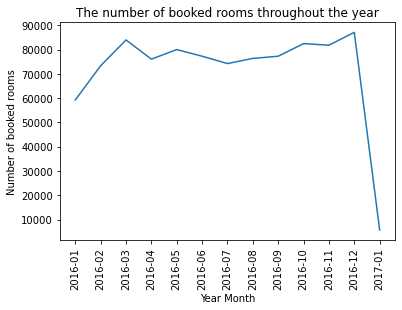

In [13]:
#Plot line chart to show the trend in booking room
plt.plot(availability.year_month,availability.booked_number)
plt.title('The number of booked rooms throughout the year')
plt.xlabel('Year Month')
plt.xticks(rotation = 90)
plt.ylabel('Number of booked rooms')
plt.show()

We can see that there was a slop increase from Jan 2016 to Mar 2016, rising 35% in the number of booked rooms in just 3 months. After we witnessed a slight decrease in a period of 4 months, from Apr 2016 till Jul 2016. In the last 5 months of the year, the number of booked room continued to increase and hit the peak at about 85k rooms booked in Dec 2016.

In [14]:
price = booked.groupby('year_month').agg({'price':'mean'}).reset_index().rename(columns = {'price':'avg_price'})

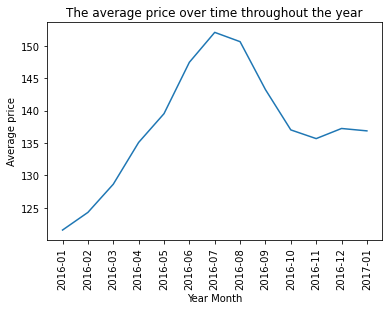

In [15]:
plt.plot(price.year_month,price.avg_price)
plt.title('The average price over time throughout the year')
plt.xlabel('Year Month')
plt.xticks(rotation = 90)
plt.ylabel('Average price')
plt.show()

In the first 7 months, average price of one booked room increased sharply, hit peak in Jul 2016 at more than 150 per night. It is interesting that we all know although the first 3 month we did witnessed a raise in number of room booked and the remaining 4 months actually went downward, the price kept increasing. Starting from Aug 2016 average price began to decrease, and in the next 2 month, from Aug to Oct there was a significant drop from 150 to 135. After that the price almost remain at the same rate, at about 135 to 140.

What factors affect the price?

In [15]:
df = calender.merge(listing2, left_on ='listing_id', right_on = 'id', how = 'left')

In [16]:
df

,listing_id,date,available,price,year_month,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities
0,241032,2016-01-04,t,85.0,2016-01,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,241032,2016-01-05,t,85.0,2016-01,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
2,241032,2016-01-06,f,109.0,2016-01,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,241032,2016-01-07,f,109.0,2016-01,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
4,241032,2016-01-08,f,109.0,2016-01,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,109.0,2016-12,10208623,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
1393566,10208623,2016-12-30,f,109.0,2016-12,10208623,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
1393567,10208623,2016-12-31,f,109.0,2016-12,10208623,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
1393568,10208623,2017-01-01,f,109.0,2017-01,10208623,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [17]:
property_type = df.groupby('property_type').agg({'id':'count','price':'mean'}).reset_index().\
rename(columns = {'id':'number_of_booking','price':'avg_price'})

In [18]:
property_type

,property_type,number_of_booking,avg_price
0,Apartment,623420,128.800937
1,Bed & Breakfast,13505,114.147501
2,Boat,2920,281.665411
3,Bungalow,4745,119.684721
4,Cabin,7665,112.508806
5,Camper/RV,4745,121.935300
6,Chalet,730,94.867123
7,Condominium,33215,144.104260
8,Dorm,730,68.375342
9,House,632910,128.065725


/var/folders/4l/wv7xbkj54tldcpmjzdsly_340000gn/T/ipykernel_931/3136583490.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(property_type.property_type, rotation=45)


Text(0, 0.5, 'Average Price')

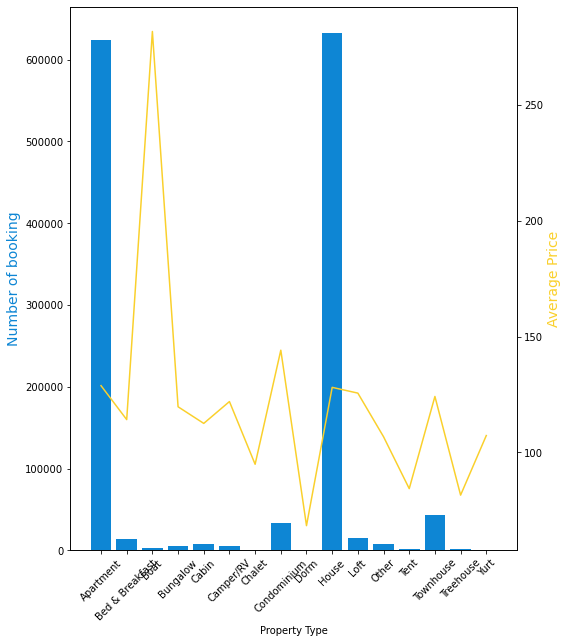

In [19]:
color_booking = '#0E86D4'
color_price = '#FAD02C'

fig, ax1 = plt.subplots(figsize=(8,10))
ax2 = ax1.twinx()

ax1.bar(property_type.property_type, property_type.number_of_booking, color = color_booking)
ax1.set_xlabel('Property Type')
ax1.set_xticklabels(property_type.property_type, rotation=45)
ax1.set_ylabel('Number of booking', color = color_booking, size = 14)

ax2.plot(property_type.property_type, property_type.avg_price, color = color_price)
ax2.set_ylabel('Average Price', color = color_price, size = 14)

It is quite obivous that most of the time people will rent either a house or an apartment, hence the similarity in averahe price rate. The average price of the 2 types of property was arounnd 125 per night. It is interesting that boat was one of the least rented property while had the highest average price, though it is understandable as boat is an expensive investment. Another interesting insight is chalet and townhouse is in top 3 & 4 in term of number of booing, while had the average renting price in top 2 & 3.

Does number of rooms available affect the average price?

In [21]:
df['number_of_rooms'] = df.bathrooms + df.bedrooms + df.beds

In [32]:
no_of_rooms = df.groupby('number_of_rooms').agg({'price':'mean', 'id':'count'}).reset_index().\
rename(columns={'price':'avg_price','id':'number_of_booking'})

In [33]:
no_of_rooms

,number_of_rooms,avg_price,number_of_booking
0,1.5,104.808219,365
1,2.0,109.109231,106215
2,2.5,84.034294,10585
3,3.0,101.069197,623785
4,3.5,96.327334,47450
5,4.0,114.545161,180675
6,4.5,111.064637,9855
7,5.0,138.874028,108040
8,5.5,122.850660,20075
9,6.0,160.427030,81760


Text(0, 0.5, 'Average Price')

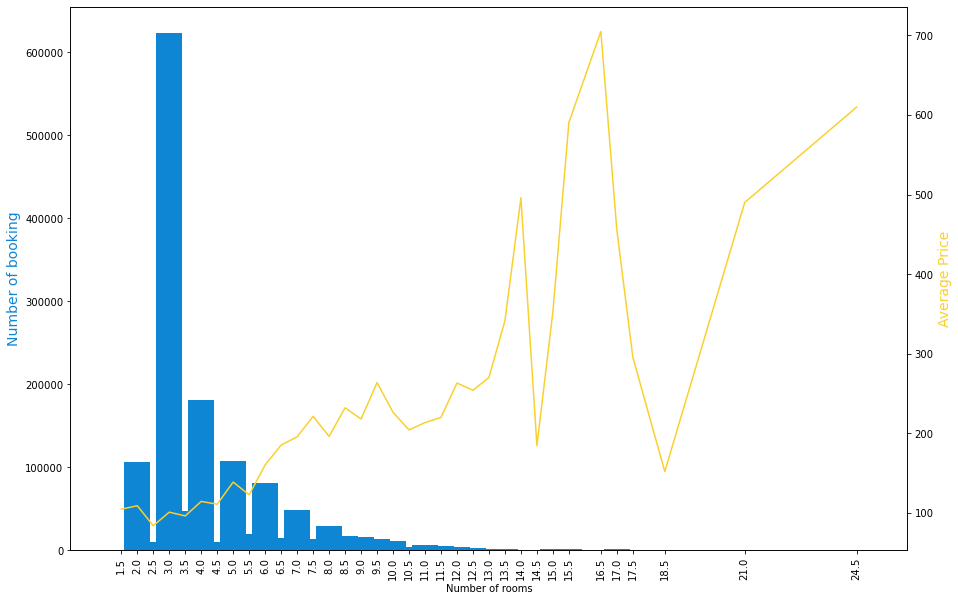

In [57]:
color_booking = '#0E86D4'
color_price = '#FAD02C'

fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()

ax1.bar(no_of_rooms.number_of_rooms, no_of_rooms.number_of_booking, color = color_booking)
ax1.set_xlabel('Number of rooms')
ax1.set_xticks(no_of_rooms.number_of_rooms)
ax1.tick_params('x',labelrotation=90)
ax1.set_xticklabels(no_of_rooms.number_of_rooms)
ax1.set_ylabel('Number of booking', color = color_booking, size = 14)

ax2.plot(no_of_rooms.number_of_rooms, no_of_rooms.avg_price, color = color_price)
ax2.set_ylabel('Average Price', color = color_price, size = 14)


It is clearly that the more rooms available the higher the average price is. This is quite understandable as properties with numerous rooms is often for large party hence the higher price. However, those properties are quite rare and the number of booking times is also fewer than smaller ones. Most properties have 2 - 4 rooms and although having the cheapest range of average price, they actually got booked the most.